In [27]:
#QUESTION A1
import pandas as pd
import numpy as np

file_path = 'D:\\BHAVIKA\\sem 5\\FDS\\dataset\\nearest-earth-objects(1910-2024).csv'
data = pd.read_csv(file_path)

#to calculate the mean
def calculate_class_centroid(data):
    return np.mean(data, axis=0)

#to calculate spread
def calculate_class_spread(data):
    return np.std(data, axis=0)

#to calculate distance between mean vectors between classes
def calculate_interclass_distance(centroid1, centroid2):
    return np.linalg.norm(centroid1 - centroid2)

class_0_data = data[data['is_hazardous'] == False][['relative_velocity', 'miss_distance']].values
class_1_data = data[data['is_hazardous'] == True][['relative_velocity', 'miss_distance']].values

centroid_0 = calculate_class_centroid(class_0_data)
centroid_1 = calculate_class_centroid(class_1_data)

spread_0 = calculate_class_spread(class_0_data)
spread_1 = calculate_class_spread(class_1_data)

interclass_distance = calculate_interclass_distance(centroid_0, centroid_1)

centroid_0, centroid_1, spread_0, spread_1, interclass_distance

(array([   49172.26550976, 41587314.11264443]),
 array([   63968.94109365, 41180152.82108147]),
 array([   25657.13015354, 20764478.51799332]),
 array([   27748.37323493, 20835181.83351614]),
 407430.06633721374)

NaN values found in the feature data. Cleaning up...


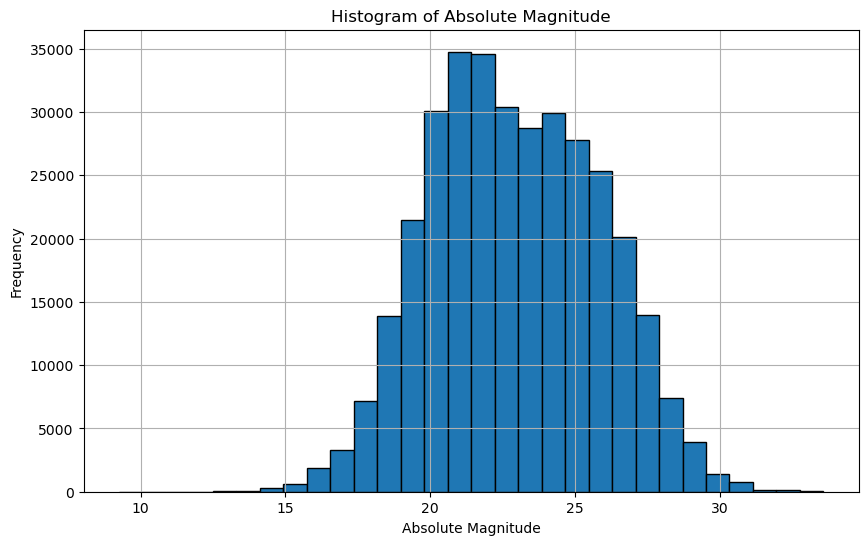

Mean: 22.932524959266164, Variance: 8.475155809285226


In [33]:
#QUESTION A2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_histogram(feature_data, bins=30, title='Histogram', xlabel='Feature', ylabel='Frequency'):
    plt.figure(figsize=(10, 6))
    plt.hist(feature_data, bins=bins, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

file_path = 'D:\\BHAVIKA\\sem 5\\FDS\\dataset\\nearest-earth-objects(1910-2024).csv'
data = pd.read_csv(file_path)

feature_data = data['absolute_magnitude']

if feature_data.isnull().any():
    print("NaN values found in the feature data. Cleaning up...")
    feature_data = feature_data.dropna()

plot_histogram(feature_data, bins=30, title='Histogram of Absolute Magnitude', xlabel='Absolute Magnitude', ylabel='Frequency')

mean_feature = np.mean(feature_data)
variance_feature = np.var(feature_data)

print(f"Mean: {mean_feature}, Variance: {variance_feature}")


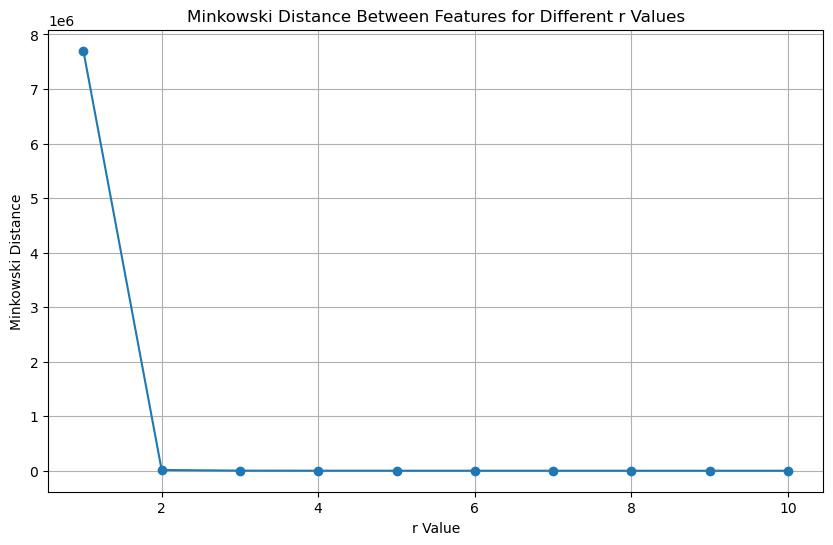

In [35]:
#QUESTION A3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_minkowski_distances(feature_data1, feature_data2, r_values):
    """
    Calculate Minkowski distances between two feature datasets for different r values.
    
    Parameters:
    - feature_data1: Pandas Series for the first feature.
    - feature_data2: Pandas Series for the second feature.
    - r_values: Array of r values for which distances are calculated.
    
    Returns:
    - distances: List of Minkowski distances corresponding to each r value.
    """
    distances = []
    for r in r_values:
        distance = np.sum(np.abs(feature_data1 - feature_data2) ** r) ** (1 / r)
        distances.append(distance)
    return distances

# Load the dataset
file_path = 'D:\\BHAVIKA\\sem 5\\FDS\\dataset\\nearest-earth-objects(1910-2024).csv'
data = pd.read_csv(file_path)

# Select the features to analyze
feature_data1 = data['absolute_magnitude'].dropna()
feature_data2 = data['estimated_diameter_min'].dropna()

# Ensure both features have the same length after dropping NaNs
common_indices = feature_data1.index.intersection(feature_data2.index)
feature_data1 = feature_data1.loc[common_indices]
feature_data2 = feature_data2.loc[common_indices]

# Define r values
r_values = np.arange(1, 11)

# Calculate Minkowski distances
distances = calculate_minkowski_distances(feature_data1, feature_data2, r_values)

# Plot the Minkowski distances
plt.figure(figsize=(10, 6))
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance Between Features for Different r Values')
plt.xlabel('r Value')
plt.ylabel('Minkowski Distance')
plt.grid(True)
plt.show()


In [43]:
#QUESTION A4
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset into a DataFrame
file_path = 'D:\\BHAVIKA\\sem 5\\FDS\\dataset\\nearest-earth-objects(1910-2024).csv'
df = pd.read_csv(file_path)

# Define the features and target
features = ['absolute_magnitude', 'relative_velocity']
target = 'is_hazardous'

# Drop rows with NaN values in either features or target
df_clean = df.dropna(subset=features + [target])

# Prepare feature matrix X and target vector y
X = df_clean[features]
y = df_clean[target].astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the sizes and shapes of the resulting datasets
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("Training set features shape:", X_train.shape)
print("Test set features shape:", X_test.shape)
print("Training set labels shape:", y_train.shape)
print("Test set labels shape:", y_test.shape)


Training set size: 236719
Test set size: 101452
Training set features shape: (236719, 2)
Test set features shape: (101452, 2)
Training set labels shape: (236719,)
Test set labels shape: (101452,)


In [59]:
#QUESTION A5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def train_knn(X_train, y_train, n_neighbors=3):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    return knn

def predict_knn(model, X_test):
    return model.predict(X_test)

def evaluate_knn(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    return accuracy, conf_matrix, class_report

knn_model = train_knn(X_train, y_train, n_neighbors=3)

y_pred = predict_knn(knn_model, X_test)

accuracy, conf_matrix, class_report = evaluate_knn(y_test, y_pred)

print("kNN Classifier (k=3) Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


kNN Classifier (k=3) Accuracy: 0.8401312936166857

Confusion Matrix:
 [[82537  6076]
 [10143  2696]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     88613
           1       0.31      0.21      0.25     12839

    accuracy                           0.84    101452
   macro avg       0.60      0.57      0.58    101452
weighted avg       0.82      0.84      0.83    101452



In [47]:
#QUESTION A6
accuracy = knn.score(X_test, y_test)
print("Accuracy of kNN Classifier (k=3) on Test Set:", accuracy)

Accuracy of kNN Classifier (k=3) on Test Set: 0.8401312936166857


In [49]:
#QUESTION A7
print("Predicted Classes for the Test Set:")
print(y_pred)
test_vect = X_test.iloc[0].values.reshape(1, -1)  # Reshape for a single prediction
predicted_class = knn.predict(test_vect)
print(f"\nPredicted Class for the given test vector {test_vect.flatten()}: {predicted_class[0]}")

Predicted Classes for the Test Set:
[0 0 0 ... 0 0 0]

Predicted Class for the given test vector [   26.        20674.6051094]: 0


C:\Users\Bhavi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy with k=1: 0.8263
Accuracy with k=2: 0.8604
Accuracy with k=3: 0.8401
Accuracy with k=4: 0.8622
Accuracy with k=5: 0.8512
Accuracy with k=6: 0.8651
Accuracy with k=7: 0.8587
Accuracy with k=8: 0.8676
Accuracy with k=9: 0.8636
Accuracy with k=10: 0.8693
Accuracy with k=11: 0.8672


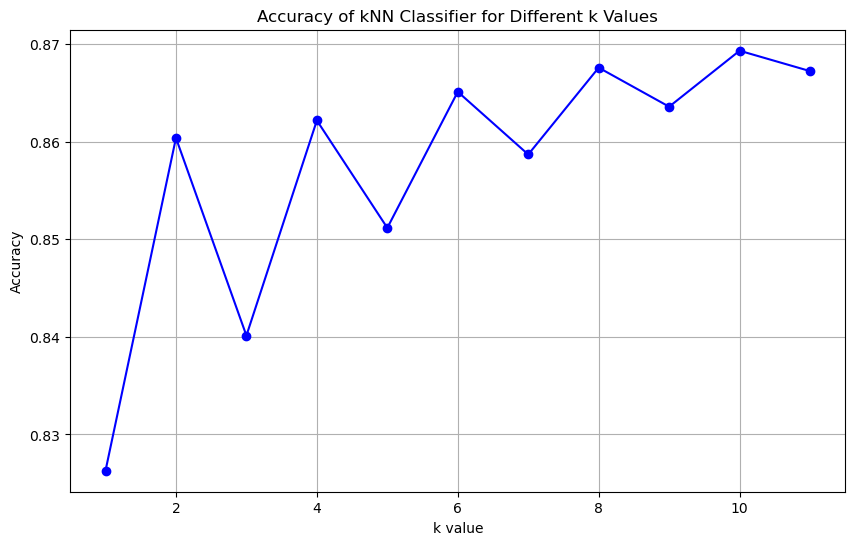

In [63]:
#QUESTION A8
accuracies = []
for k in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with k={k}: {accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Accuracy of kNN Classifier for Different k Values')
plt.grid(True)
plt.show()

In [61]:
#QUESTION A9
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix for Training Data:")
print(train_conf_matrix)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix for Test Data:")
print(test_conf_matrix)
print("\nClassification Report for Training Data:")
print(classification_report(y_train, y_train_pred))
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

Confusion Matrix for Training Data:
[[204661   1735]
 [ 27558   2765]]

Confusion Matrix for Test Data:
[[87468  1145]
 [12324   515]]

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93    206396
           1       0.61      0.09      0.16     30323

    accuracy                           0.88    236719
   macro avg       0.75      0.54      0.55    236719
weighted avg       0.85      0.88      0.83    236719


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     88613
           1       0.31      0.04      0.07     12839

    accuracy                           0.87    101452
   macro avg       0.59      0.51      0.50    101452
weighted avg       0.80      0.87      0.82    101452

